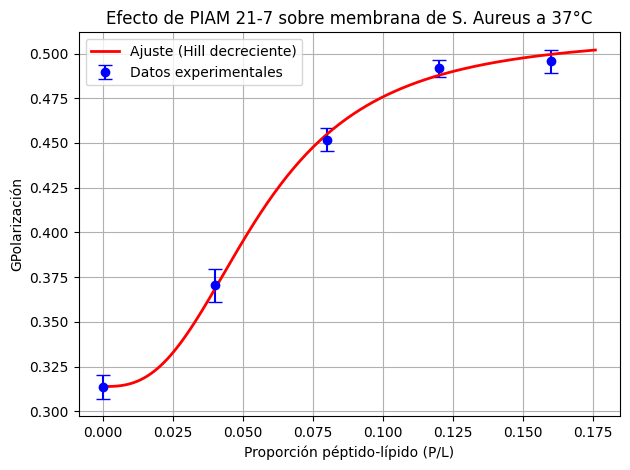

y_min = 0.5107
y_max = 0.3138
Kd = 0.0569
n  = 2.7147
y_max = 0.3138
Kd = 0.0569
n (cooperatividad) = 2.7147


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

P_L = np.array([0.16,0.12,0.08,0.04,0])
GP_raw = np.array([0.49564388,0.49165366,0.451928858,0.37033796,0.31355659])
desviaciones = np.array([0.00647463,0.005020204,0.006422845,0.00926501,0.006562608])

def hill_decay(L, y_min, y_max, Kd, n):
    return y_min + (y_max - y_min) * (Kd**n / (Kd**n + L**n))

p0 = [min(GP_raw), max(GP_raw), 0.05, 1.0]

params, _ = curve_fit(hill_decay, P_L, GP_raw, sigma=desviaciones,
                      absolute_sigma=True, p0=p0, bounds=(0, np.inf))

y_min_fit, y_max_fit, Kd_fit, n_fit = params

L_fit = np.linspace(0, max(P_L)*1.1, 300)
GP_fit = hill_decay(L_fit, *params)

plt.errorbar(P_L, GP_raw, yerr=desviaciones, fmt='o', label='Datos experimentales', capsize=5, color='blue')
plt.plot(L_fit, GP_fit, label='Ajuste (Hill decreciente)', color='red', linewidth=2)

plt.xlabel('Proporción péptido-lípido (P/L)')
plt.ylabel('GPolarización')
plt.title('Efecto de PIAM 21-7 sobre membrana de S. Aureus a 37°C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'y_min = {y_min_fit:.4f}')
print(f'y_max = {y_max_fit:.4f}')
print(f'Kd = {Kd_fit:.4f}')
print(f'n  = {n_fit:.4f}')

print(f'y_max = {y_max_fit:.4f}')
print(f'Kd = {Kd_fit:.4f}')
print(f'n (cooperatividad) = {n_fit:.4f}')

